In [1]:
import numpy as np
import h5py
import matplotlib
from matplotlib import pyplot as plt
import fastmri
from fastmri.data import transforms as T
import sys
from PIL import Image
sys.path.append('../')
from utils.common_fcns import *

/home/alex/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load a scan in
data_dir = '../data/multicoil_test/'
file = data_dir+'file_brain_AXT2_200_2000482.h5'
hf = h5py.File(file)
volume_kspace = hf['kspace'][()]
n_slices = volume_kspace.shape[0]
print('Number of Slices for this file: '+str(n_slices))

Number of Slices for this file: 16


In [7]:
# Will compute average error over slices in-place
N = 3000 #256*256
K = np.arange(1, N, 10)
error = np.zeros(len(K))

# Iterate over all the slices
for slice_idx in range(n_slices):
    print('Starting slice: '+str(slice_idx))
    X_raw = combine_all_coils(volume_kspace,slice_idx)
    X = resize_scan(X_raw)
    for ii, k in enumerate(K):
        error[ii] += evaluate_k(k,X)

error = error/n_slices

Starting slice: 0
Starting slice: 1
Starting slice: 2
Starting slice: 3
Starting slice: 4
Starting slice: 5
Starting slice: 6
Starting slice: 7
Starting slice: 8
Starting slice: 9
Starting slice: 10
Starting slice: 11
Starting slice: 12
Starting slice: 13
Starting slice: 14
Starting slice: 15


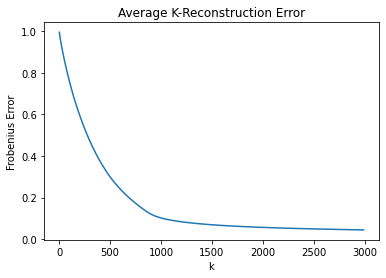

In [8]:
plt.plot(K, error)
plt.xlabel('k')
plt.ylabel('Frobenius Error')
plt.title('Average K-Reconstruction Error')
plt.show()

In [9]:
# Average error for k=3000
print(error[-1])

0.04423449013847858
